In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Sales & Marketing Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,trainer_name,training_price,discount_training,satisfaction_level,training_session,number_of_participant,training_field,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,Ibun,6000000.0,50,5,17,18,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,Reza,6000000.0,50,5,17,18,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,Ibun,6000000.0,50,5,17,19,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,Reza,6000000.0,50,5,17,18,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,Haris,6000000.0,50,5,17,19,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   5000 non-null   int64  
 1   company_ID                                   5000 non-null   object 
 2   company_name                                 5000 non-null   object 
 3   company_pic                                  5000 non-null   object 
 4   company_address                              5000 non-null   object 
 5   company_phone                                5000 non-null   object 
 6   company_email                                5000 non-null   object 
 7   company_field                                5000 non-null   object 
 8   transaction_date                             5000 non-null   object 
 9   level_training_process                       5000 non-null   int64  
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop("cross_selling", axis=1, inplace=True)

In [5]:
X = df.drop("upselling", axis=1)
y = df["upselling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = joblib.load(r"./pipeline_save/pipeline1.joblib")


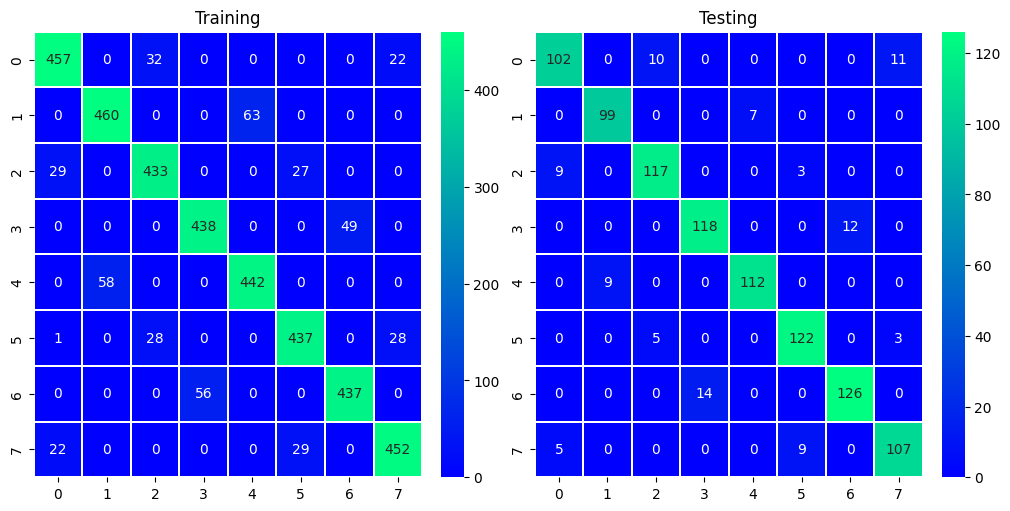

In [6]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [7]:
print(classification_report(y_test, y_pred))

                                                   precision    recall  f1-score   support

          Advanced Digital Marketing & Foundation       0.88      0.83      0.85       123
       Marketing Research For Business Using SPSS       0.92      0.93      0.93       106
              Optimizing in Growing Your Business       0.89      0.91      0.90       129
                       Powerful Closing Technique       0.89      0.91      0.90       130
Presentation & Selling Skills Using Story-Telling       0.94      0.93      0.93       121
                      Professional Selling Skills       0.91      0.94      0.92       130
      Sales Forecasting: for Sales Target Results       0.91      0.90      0.91       140
            Social Selling: Optimizing Engagement       0.88      0.88      0.88       121

                                         accuracy                           0.90      1000
                                        macro avg       0.90      0.90      0.90      10

In [8]:
a = model.predict_proba(X_test.iloc[:1, :])
b = ["Advanced Digital Marketing & Foundation", "Marketing Research For Business Using SPSS",
     "Optimizing in Growing Your Business", "Powerful Closing Technique", "Presentation & Selling Skills Using Story-Telling",
     "Professional Selling Skills", "Sales Forecasting: for Sales Target Results", "Social Selling: Optimizing Engagement"]
for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

Advanced Digital Marketing & Foundation 12.46%
Marketing Research For Business Using SPSS 8.78%
Optimizing in Growing Your Business 37.03%
Powerful Closing Technique 8.21%
Presentation & Selling Skills Using Story-Telling 8.43%
Professional Selling Skills 8.32%
Sales Forecasting: for Sales Target Results 8.30%
Social Selling: Optimizing Engagement 8.46%


In [9]:
model.predict(X_test.iloc[:1, :])

array(['Optimizing in Growing Your Business'], dtype=object)

In [10]:
y_test.iloc[0]

'Advanced Digital Marketing & Foundation'

In [11]:
X_test.iloc[:1]

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_price,discount_training,satisfaction_level,training_session,number_of_participant,training_field,training_name
1501,1501,P1502,UD Napitupulu (Persero) Tbk,Kadir Sitompul,"Gg. Otto Iskandardinata No. 14\nSalatiga, DKI ...",+62 (0993) 413-3583,purwantitugiman@example.org,Aktivitas Kesehatan Manusia Dan Aktivitas Sosial,2024-02-10,4,...,4,B1502,Ibun,5600000.0,30,4,14,15,Sales & Marketing Series,Advanced Digital Marketing & Foundation


In [15]:
import json
a = {
"Unnamed: 0": 0,
"company_ID": "P0001",
"company_name": "Tribakti Inspektama",
"company_pic": "Lasmanto Pratiwi",
"company_address": "Jalan Cihampelas No. 282 Pontianak, Kalimantan Tengah 30563",
"company_phone": "+62 (183) 655 1415",
"company_email": "muhammadnasyidah@example.org",
"company_field": "Aktivitas Keuangan dan Asuransi",
"transaction_date": "2020-01-01",
"level_training_process": 5,
"purchasing_time_patterns": "diskon",
"number_of_participants": 14,
"group": "Group",
"total_payment": 108000000.0,
"satisfaction": 4,
"communication_channel": "social media",
"complaints": "positif",
"communication_quality": "bagus",
"possibility_of_purchasing_the_same_training": 86,
"frequency_engagement": 10,
"brand_sustainability": 2,
"rating_training": 5,
"tren_mode_factor": "Ya",
"interest_in_discount_program": 5,
"training_ID": "B0001",
"trainer_name": "Ibun",
"training_price": 6000000.0,
"discount_training": 50,
"satisfaction_level": 5,
"training_session": 17,
"number_of_participant": 18,
"training_field": "Sales & Marketing Series",
"training_name": "Sales Forecasting: for Sales Target Results",
"upselling": "Sales Forecasting: for Sales Target Results"
}

a = pd.json_normalize(a)
a

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,training_ID,trainer_name,training_price,discount_training,satisfaction_level,training_session,number_of_participant,training_field,training_name,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282 Pontianak, Kalimantan...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,B0001,Ibun,6000000.0,50,5,17,18,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Sales Forecasting: for Sales Target Results


In [17]:
model.predict_proba(a)

array([[0.07224037, 0.07260051, 0.0681197 , 0.11196718, 0.06968347,
        0.06877049, 0.46665467, 0.06996361]])

In [19]:
c = []
d = model.predict_proba(a)
for i, j in zip(b, d.ravel()):
    c.append([i, float(f"{j*100:.2f}")])
c

[['Advanced Digital Marketing & Foundation', 7.22],
 ['Marketing Research For Business Using SPSS', 7.26],
 ['Optimizing in Growing Your Business', 6.81],
 ['Powerful Closing Technique', 11.2],
 ['Presentation & Selling Skills Using Story-Telling', 6.97],
 ['Professional Selling Skills', 6.88],
 ['Sales Forecasting: for Sales Target Results', 46.67],
 ['Social Selling: Optimizing Engagement', 7.0]]

In [22]:
c.sort(key=lambda x: x[1], reverse=True)
c

[['Sales Forecasting: for Sales Target Results', 46.67],
 ['Powerful Closing Technique', 11.2],
 ['Marketing Research For Business Using SPSS', 7.26],
 ['Advanced Digital Marketing & Foundation', 7.22],
 ['Social Selling: Optimizing Engagement', 7.0],
 ['Presentation & Selling Skills Using Story-Telling', 6.97],
 ['Professional Selling Skills', 6.88],
 ['Optimizing in Growing Your Business', 6.81]]

In [23]:
[i[0] for i in c]

['Sales Forecasting: for Sales Target Results',
 'Powerful Closing Technique',
 'Marketing Research For Business Using SPSS',
 'Advanced Digital Marketing & Foundation',
 'Social Selling: Optimizing Engagement',
 'Presentation & Selling Skills Using Story-Telling',
 'Professional Selling Skills',
 'Optimizing in Growing Your Business']

In [25]:
[f"{i[0]}: {i[1]}%" for i in c]

['Sales Forecasting: for Sales Target Results: 46.67%',
 'Powerful Closing Technique: 11.2%',
 'Marketing Research For Business Using SPSS: 7.26%',
 'Advanced Digital Marketing & Foundation: 7.22%',
 'Social Selling: Optimizing Engagement: 7.0%',
 'Presentation & Selling Skills Using Story-Telling: 6.97%',
 'Professional Selling Skills: 6.88%',
 'Optimizing in Growing Your Business: 6.81%']